In [1]:
import pandas as pd
import numpy as np  
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import sqlite3
import sqlite3
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os

In [2]:
import scipy

In [3]:
from scipy import stats

In [4]:
from scipy.stats import pearsonr

In [5]:
from scipy.stats import ttest_ind

In [6]:
from sklearn.metrics import classification_report

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [9]:
import requests

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# machine learning algorithm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import math
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [15]:
# evaluation on test data
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# DATA CLEANING AND FEATURE ENGINEERING

In [17]:
creditt = pd.read_csv(r"C:\Users\shedu\Deskop\credit.csv")

In [18]:
fil = (creditt['EDUCATION'] == 5) | (creditt['EDUCATION'] == 6) | (creditt['EDUCATION'] == 0)
creditt.loc[fil, 'EDUCATION'] = 4

In [19]:
fil = creditt['MARRIAGE'] == 0
creditt.loc[fil, 'MARRIAGE'] = 3

In [20]:
creditt.drop(columns=['ID', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'], inplace=True)

In [21]:
#creditt['MARRIAGE'].unique()
continuous_cols = ['AGE','PAY_0','PAY_2','PAY_4', 'PAY_5','PAY_6', 'PAY_3','BILL_AMT1','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# OUTLIERS- IDENTIFICATION & REMOVAL

In [22]:
Q1 = creditt[continuous_cols].quantile(0.25)
Q3 = creditt[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((creditt[continuous_cols] < (Q1 - 1.5 * IQR)) | (creditt[continuous_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

In [23]:
# Remove outliers
creditt1 = creditt[~outliers].reset_index(drop=True)

In [24]:
from sklearn.datasets import make_classification

In [25]:
from sklearn.decomposition import PCA

# DATA STANDARDISATION USING STANDARD SCALER

In [26]:
X = creditt1.drop(columns=['DEFAULT_PAYMENT'])
y =creditt1['DEFAULT_PAYMENT']

In [27]:
X, y = make_classification(n_samples=48000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [29]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=19) 
X_pca = pca.fit_transform(X_scale)

In [30]:
X_pca

array([[ 2.42941171e+00,  1.02475569e-01,  1.57265100e+00, ...,
        -3.58850524e-16, -1.60695326e-16, -4.36427684e-16],
       [ 1.74684023e+00,  8.77319998e-01, -7.70964021e-01, ...,
         1.96260988e-16, -1.60695326e-16,  3.96239584e-16],
       [-1.54235775e+00, -2.01542023e+00, -3.17152649e-01, ...,
        -2.57836167e-17,  1.72371582e-16,  6.31726768e-17],
       ...,
       [ 9.44077765e-01, -6.06829592e-01,  3.35142900e-01, ...,
        -8.12947679e-17, -2.71717628e-16, -3.39718378e-17],
       [ 1.33227914e+00,  1.72208357e+00,  6.06033732e-02, ...,
        -1.36805919e-16,  5.83812806e-18,  6.31726768e-17],
       [ 7.18862129e-01, -6.18547270e-01, -6.05836329e-02, ...,
        -8.12947679e-17,  2.83393884e-16,  1.74194979e-16]])

# DATA BALANCING USING SMOTE

In [31]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_pca,  y)
print('Original dataset shape', len(creditt))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29999
Resampled dataset shape 76800


In [32]:
X_smote

array([[ 2.42941171e+00,  1.02475569e-01,  1.57265100e+00, ...,
        -3.58850524e-16, -1.60695326e-16, -4.36427684e-16],
       [ 1.74684023e+00,  8.77319998e-01, -7.70964021e-01, ...,
         1.96260988e-16, -1.60695326e-16,  3.96239584e-16],
       [-1.54235775e+00, -2.01542023e+00, -3.17152649e-01, ...,
        -2.57836167e-17,  1.72371582e-16,  6.31726768e-17],
       ...,
       [-6.76489284e+00,  2.11458992e-01, -4.15678790e-01, ...,
        -2.11568346e-16, -4.56381020e-16, -2.85983501e-17],
       [-5.25404643e+00, -1.11415316e+00, -1.68446545e+00, ...,
         6.62315146e-17, -6.60295687e-16,  7.66152559e-18],
       [-4.19033965e+00, -1.24257871e+00,  1.79669425e-01, ...,
        -5.68377401e-17, -2.05855102e-16, -1.03360777e-16]])

In [33]:
columns = list(creditt1.columns)

In [34]:
columns.pop()

'DEFAULT_PAYMENT'

In [35]:
balancedr = pd.DataFrame(X_smote, columns=columns)

In [36]:
balancedr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2.429412,0.102476,1.572651,-0.173543,-1.780640,0.252642,-2.595633,-1.139847,-0.395881,-0.348189,-2.483430e-16,8.639786e-17,4.720693e-18,7.972401e-17,1.860370e-16,-2.534996e-16,-3.588505e-16,-1.606953e-16,-4.364277e-16
1,1.746840,0.877320,-0.770964,-0.219406,-0.949367,2.142983,0.282465,1.051484,-0.843514,0.064914,-4.091622e-17,1.719941e-16,-1.215804e-16,-2.002219e-16,2.716555e-17,-1.507423e-16,1.962610e-16,-1.606953e-16,3.962396e-16
2,-1.542358,-2.015420,-0.317153,0.376522,1.216865,0.542801,0.355154,0.932195,-1.727748,-0.711480,2.488097e-16,-2.365889e-16,1.822177e-16,2.991845e-18,-1.498564e-16,-1.017422e-16,-2.578362e-17,1.723716e-16,6.317268e-17
3,1.176750,-1.261416,-0.188585,1.028942,-1.064151,0.620332,0.487053,-0.299104,-0.863202,-1.064822,2.939481e-16,-9.929909e-17,-2.199624e-17,-9.176419e-17,-1.947897e-16,1.237234e-16,1.129943e-16,-2.439621e-16,2.019506e-16
4,2.246641,0.796269,0.619413,0.285606,-0.561902,0.178322,0.582140,-0.603861,-1.574217,1.823022,-3.132742e-16,2.697928e-16,2.969080e-16,-5.931148e-17,-2.530663e-16,-1.800965e-16,1.962610e-16,6.134928e-17,7.661526e-18


In [37]:
balancedr['DEFAULT_PAYMENT'] = y_smote

<Axes: xlabel='DEFAULT_PAYMENT', ylabel='count'>

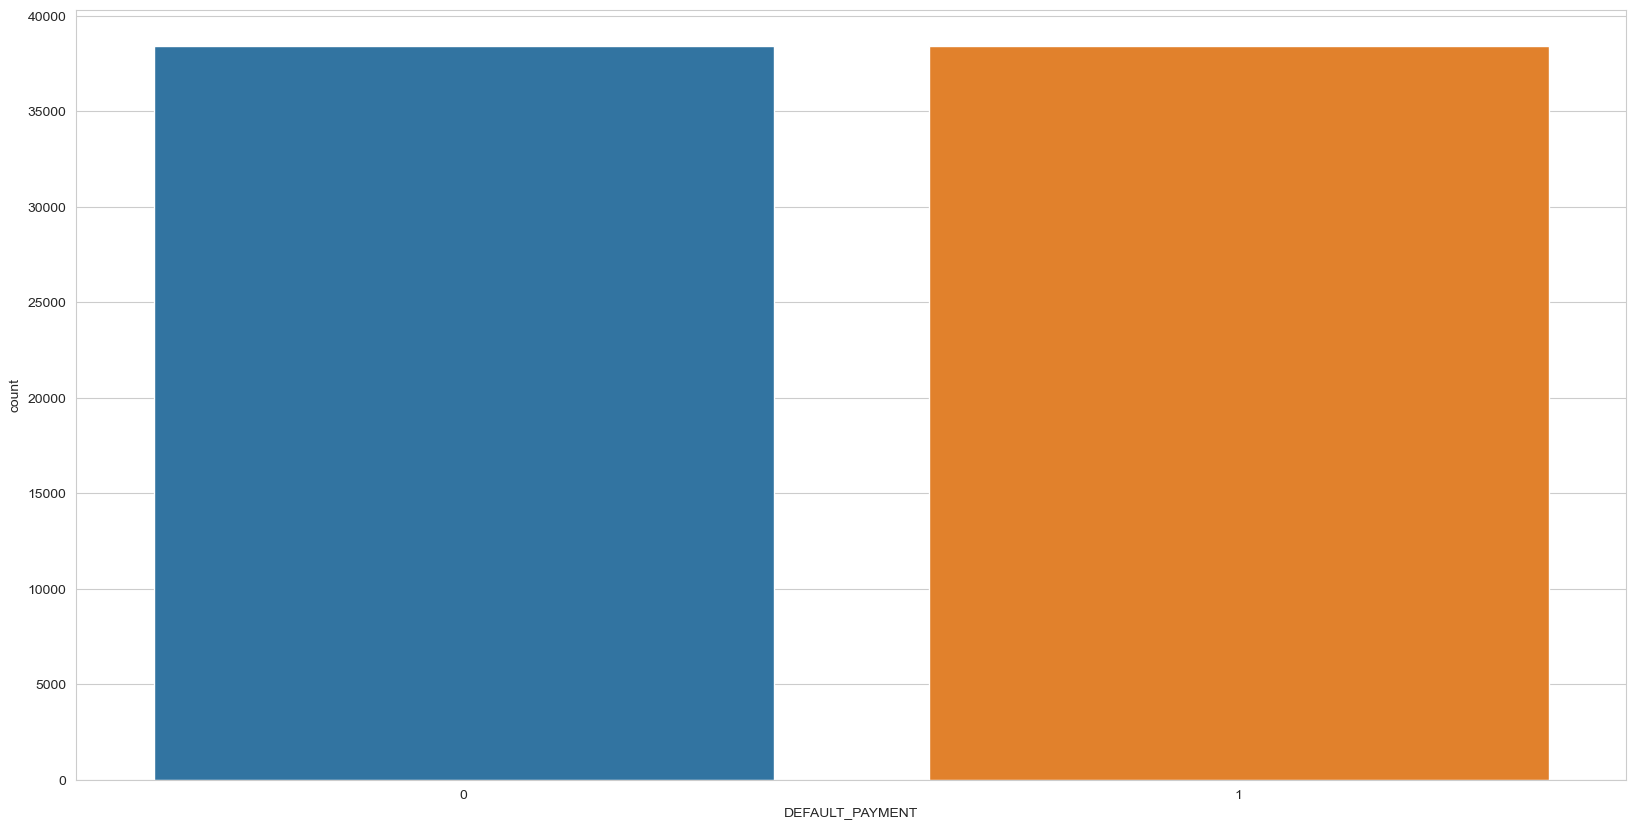

In [38]:
sns.countplot (x = 'DEFAULT_PAYMENT', data = balancedr)

In [39]:
X_smote.shape

(76800, 19)

In [40]:
y_smote.shape

(76800,)

In [41]:
from sklearn.datasets import make_classification

In [42]:
from sklearn.decomposition import PCA

# TRAIN-TEST SPLIT

In [43]:
X, y = make_classification(n_samples=48000, n_features=19, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.8, 0.2], flip_y=0, random_state=42)

In [44]:
X = balancedr.drop(columns=['DEFAULT_PAYMENT'])
y = balancedr['DEFAULT_PAYMENT']

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
feature_names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT']

In [47]:
balancedr.to_csv('clean_creditt.csv')

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# LOGISTIC REGRESSION

In [49]:
#fitting data into Logistic Regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [50]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [51]:
#getting all score for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.982
The accuracy on test data is  0.983
The precision on test data is  0.983
The recall on test data is  0.982
The f1 on test data is  0.983
The roc_score on test data is  0.983


[[7620  134]
 [ 132 7474]]


[Text(0, 0.5, 'Non Default'), Text(0, 1.5, 'Default')]

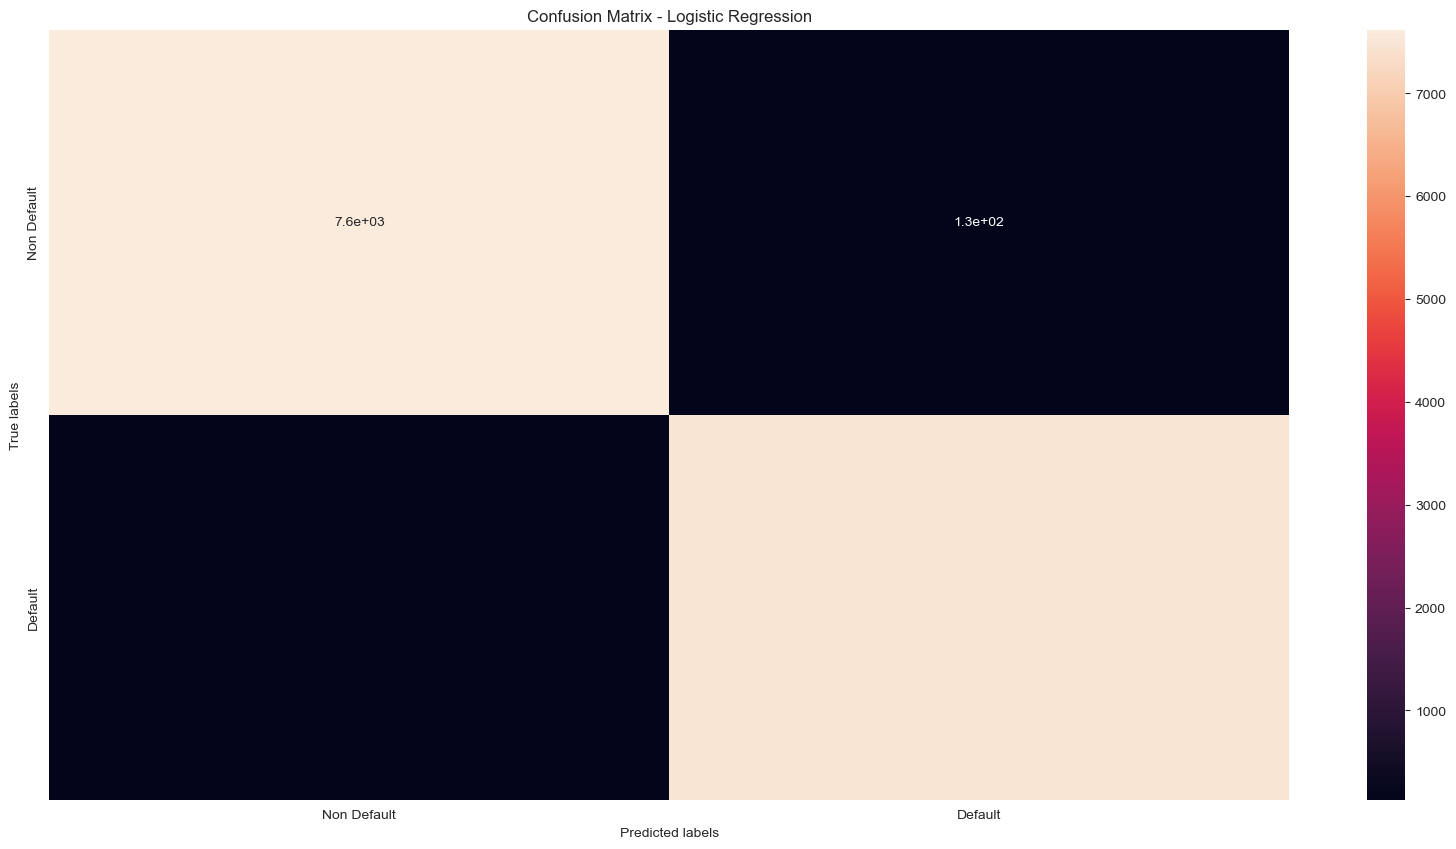

In [52]:
#Confusion matrix
labels = ['Non Default', 'Default']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Random Forest

In [53]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [55]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [56]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.993
The precision on test data is  0.993
The recall on test data is  0.993
The f1 on test data is  0.993
The roc_score on test data is  0.993


[[7700   54]
 [  56 7550]]


[Text(0, 0.5, 'Non Default'), Text(0, 1.5, 'Default')]

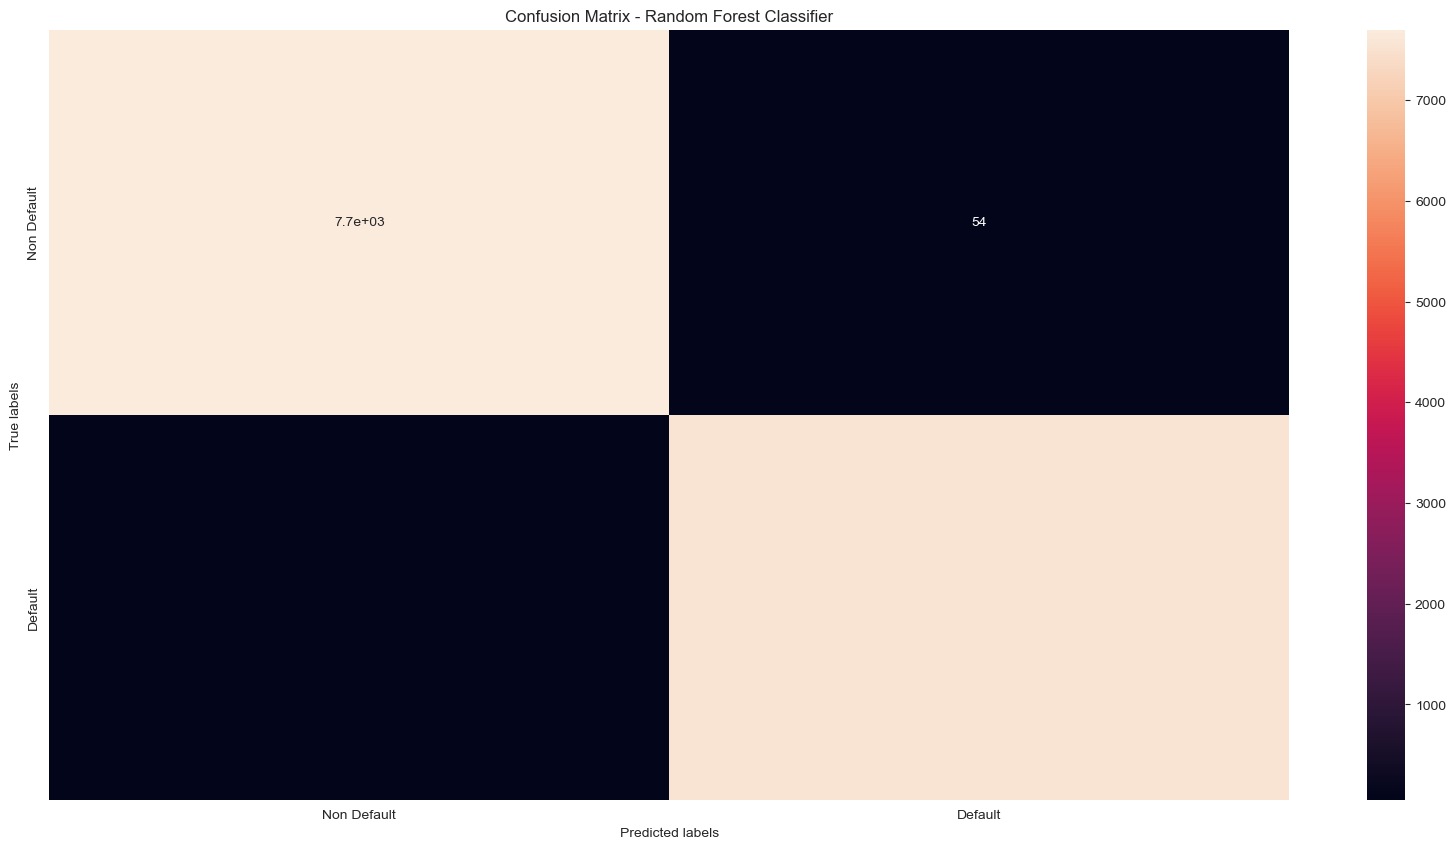

In [57]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Non Default', 'Default']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# XGBOOST

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
import xgboost as xgb

In [60]:
import numpy as np
import pandas as pd

In [61]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, scale_pos_weight=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
# Predict
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

In [63]:
# Evaluate
Xg_accuracy = accuracy_score(y_test, y_pred)
Xg_precision = precision_score(y_test, y_pred)
Xg_recall = recall_score(y_test, y_pred)
Xg_f1 = f1_score(y_test, y_pred)
Xg_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [64]:
print(f"Accuracy: {Xg_accuracy:.3f}")
print(f"Precision: {Xg_precision:.3f}")
print(f"recall: {Xg_recall:.3f}")
print(f"f1_score: {Xg_f1:.3f}")
print(f"roc_auc: {Xg_roc_auc:.3f}")

Accuracy: 0.993
Precision: 0.994
recall: 0.993
f1_score: 0.993
roc_auc: 1.000


In [65]:
print(f"roc_auc: {Xg_roc_auc:.3f}")

roc_auc: 1.000


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


[[7707   47]
 [  54 7552]]


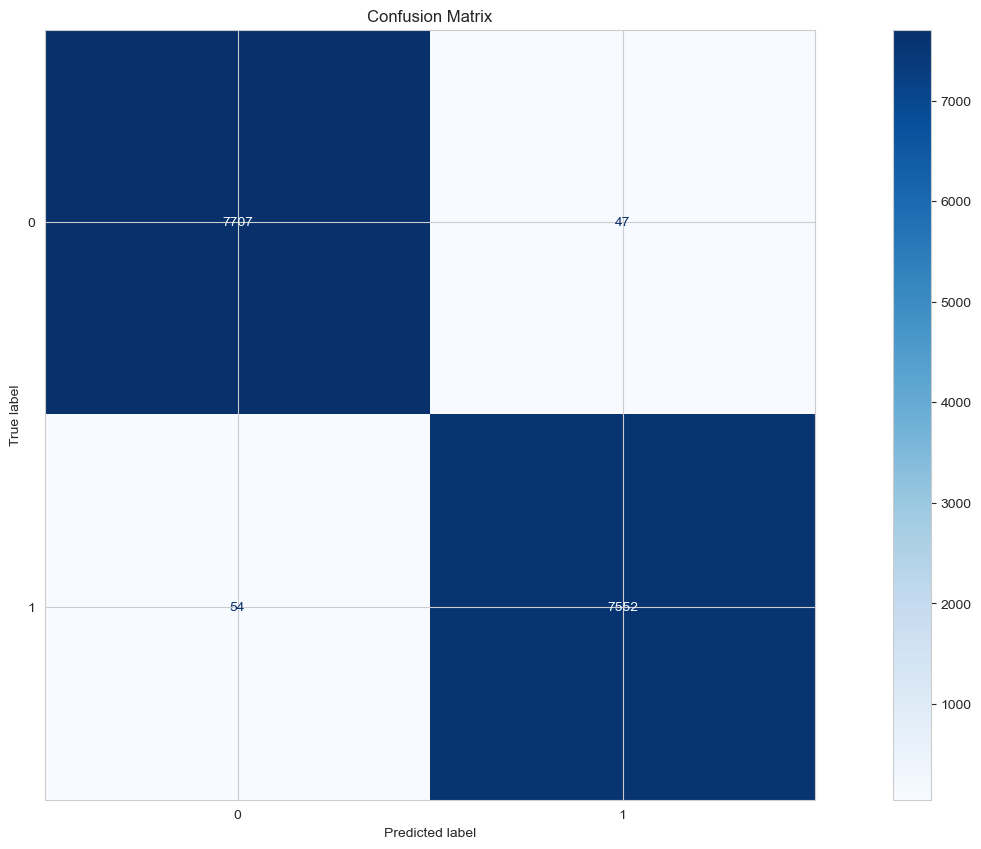

In [67]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# SVC + LASSO

In [68]:
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [69]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the data
    ('feature_selection', SelectFromModel(Lasso(alpha=0.01, max_iter=10000))),  # Lasso for feature selection
    ('svm', SVC(kernel='linear', C=1.0, probability=True))  # SVM with linear kernel
])

In [70]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.01, max_iter=10000))),
                ('svm', SVC(kernel='linear', probability=True))])

In [71]:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


In [72]:
sv_accuracy = accuracy_score(y_test, y_pred)
sv_precision = precision_score(y_test, y_pred)
sv_recall = recall_score(y_test, y_pred)
sv_f1 = f1_score(y_test, y_pred)
sv_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [73]:
print(f"Accuracy: {sv_accuracy:.3f}")
print(f"Precision: {sv_precision:.3f}")
print(f"Recall: {sv_recall:.3f}")
print(f"F1 Score: {sv_f1:.3f}")
print(f"ROC AUC: {sv_roc_auc:.3f}")

Accuracy: 0.983
Precision: 0.983
Recall: 0.983
F1 Score: 0.983
ROC AUC: 0.999


[[7622  132]
 [ 133 7473]]


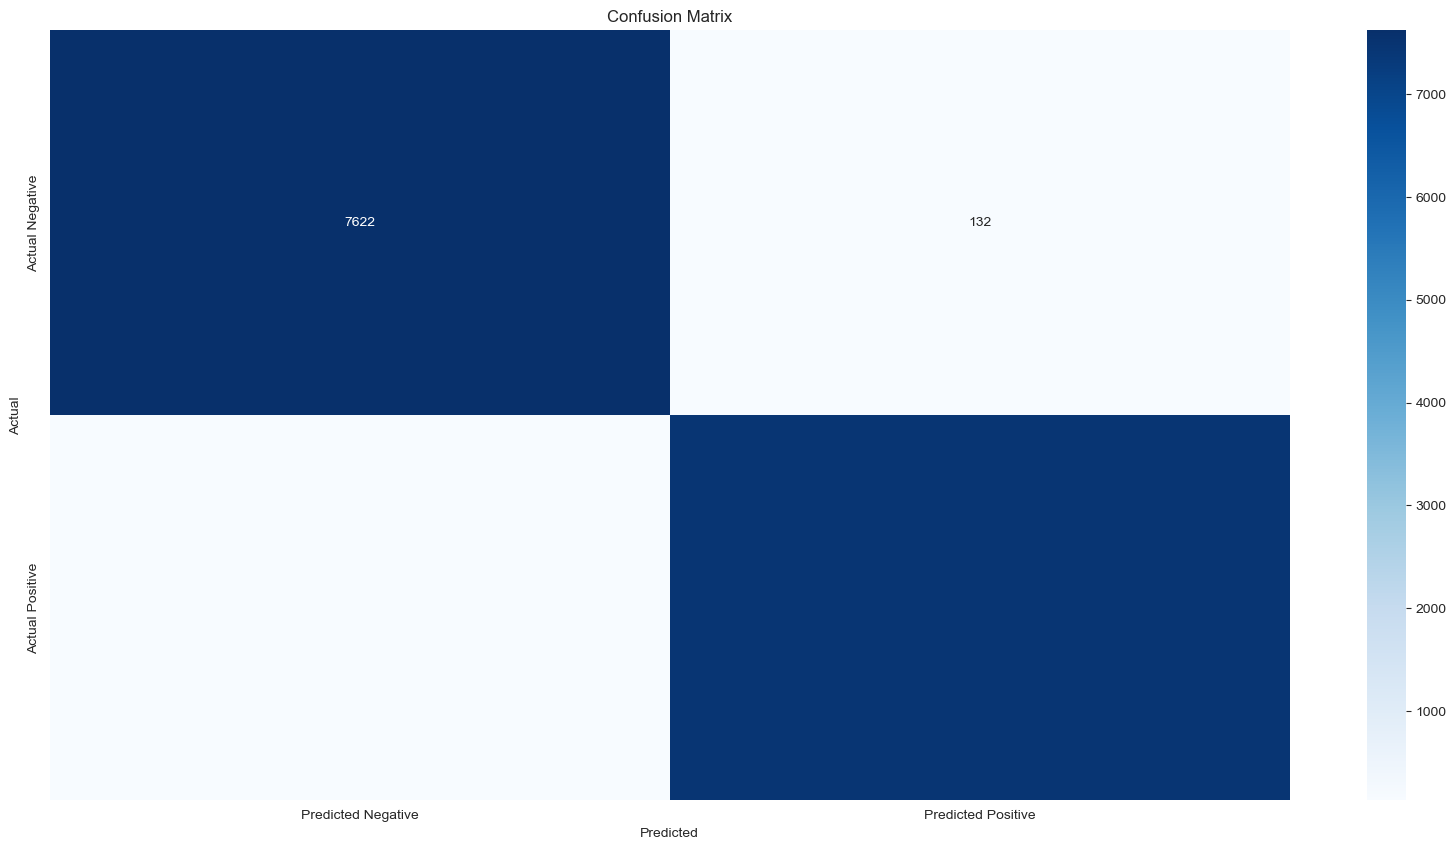

In [74]:

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ENSEMBLE 1 - LR, RF & XGBOOST

In [75]:
#ensemle model

In [76]:
lr = LogisticRegression(solver='liblinear', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [77]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [78]:
# Create a VotingClassifier with soft voting
ensemble = VotingClassifier(estimators=[
    ('lr', lr), 
    ('rf', rf), 
    ('xgb', xgb)
], voting='soft')



In [79]:
# Train the ensemble model
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='log...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [80]:
# Make predictions
y_pred = ensemble.predict(X_test)
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]


In [81]:
# Evaluate the ensemble model
ens1_accuracy = accuracy_score(y_test, y_pred)
ens1_precision = precision_score(y_test, y_pred)
ens1_recall = recall_score(y_test, y_pred)
ens1_f1 = f1_score(y_test, y_pred)
ens1_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {ens1_accuracy:.3f}")
print(f"Precision: {ens1_precision:.3f}")
print(f"Recall: {ens1_recall:.3f}")
print(f"F1 Score: {ens1_f1:.3f}")
print(f"ROC AUC: {ens1_roc_auc:.3f}")


Accuracy: 0.993
Precision: 0.993
Recall: 0.994
F1 Score: 0.993
ROC AUC: 1.000


[[7697   57]
 [  44 7562]]


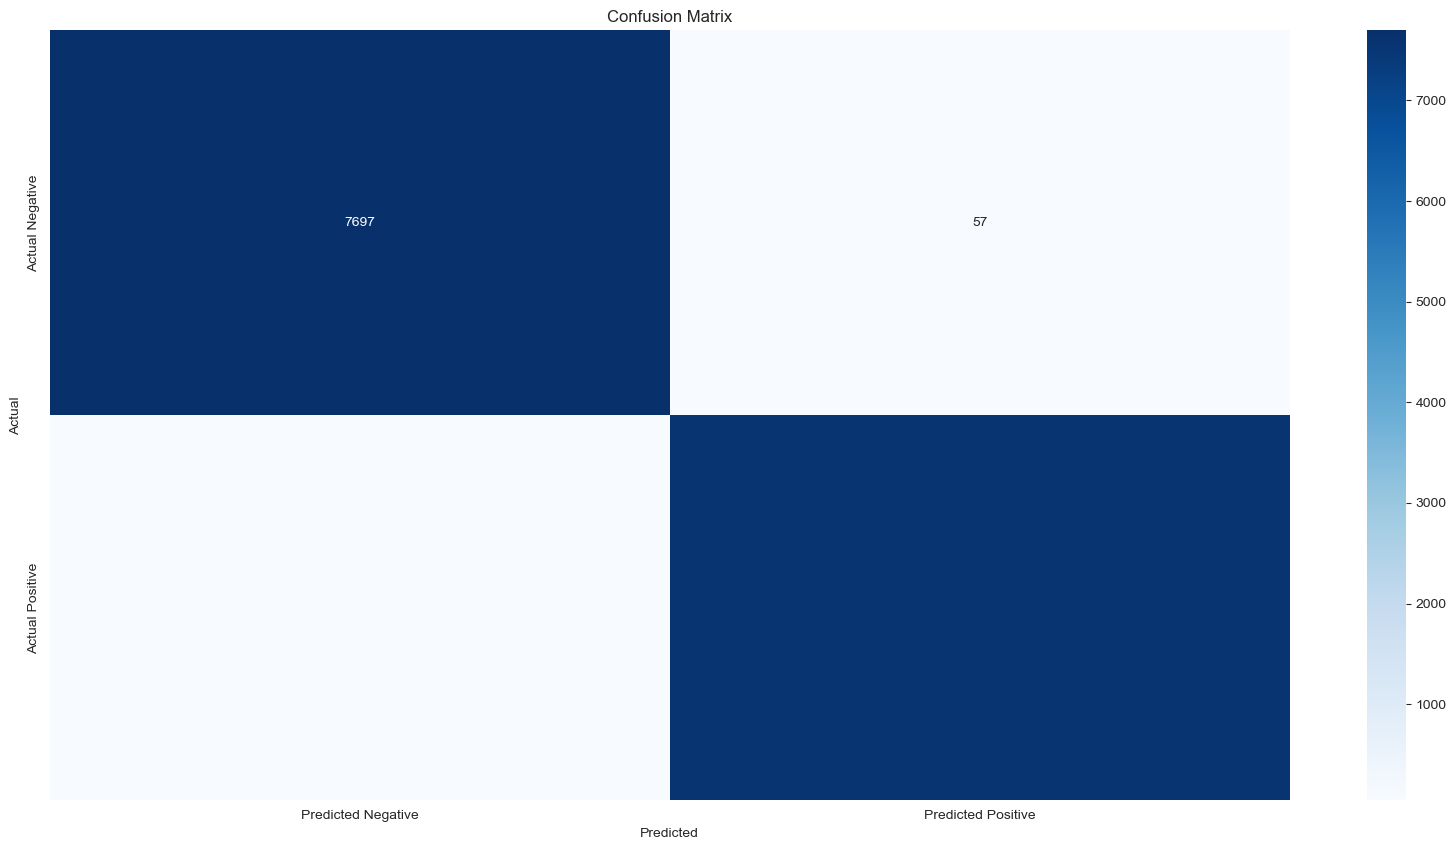

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ENSEMBLE2 - LR, SVM_LASSO & XGBOOST

In [83]:
from sklearn.pipeline import make_pipeline 

In [84]:
# Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=42)

In [85]:
# SVM with Lasso (Lasso is used as feature selection within a pipeline)
svm_lasso = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, random_state=42))



In [86]:
# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [87]:
ensemble = VotingClassifier(estimators=[
    ('lr', lr), 
    ('svm_lasso', svm_lasso), 
    ('xgb', xgb)
], voting='soft')



In [88]:
# Train the ensemble model
ensemble.fit(X_train, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('svm_lasso',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=No...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [89]:
# Make predictions
y_pred = ensemble.predict(X_test)
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]

In [90]:
# Evaluate the ensemble model
ens2_accuracy = accuracy_score(y_test, y_pred)
ens2_precision = precision_score(y_test, y_pred)
ens2_recall = recall_score(y_test, y_pred)
ens2_f1 = f1_score(y_test, y_pred)
ens2_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [91]:
print(f"Accuracy: {ens2_accuracy:.3f}")
print(f"Precision: {ens2_precision:.3f}")
print(f"Recall: {ens2_recall:.3f}")
print(f"F1 Score: {ens2_f1:.3f}")
print(f"ROC AUC: {ens2_roc_auc:.3f}")


Accuracy: 0.989
Precision: 0.989
Recall: 0.989
F1 Score: 0.989
ROC AUC: 0.999


Text(222.31597222222223, 0.5, 'Actual')

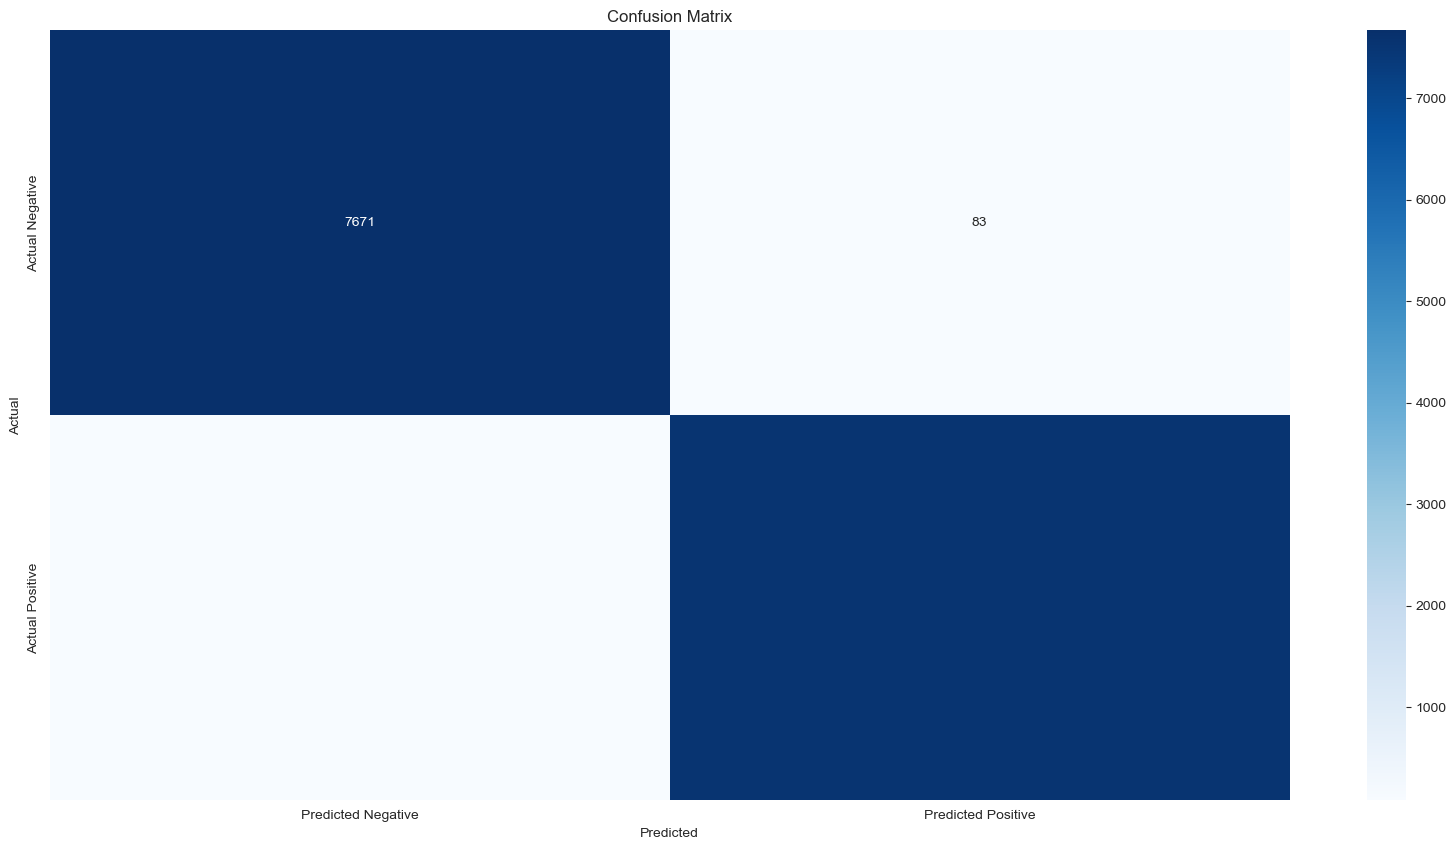

In [92]:
# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ENSEMBLE3 - RF, XGBOOST

In [93]:
# Create a VotingClassifier with soft voting
ensemble = VotingClassifier(estimators=[
    ('rf', rf), 
    ('xgb', xgb)
], voting='soft')


In [94]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [95]:
y_pred = ensemble.predict(X_test)
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]


In [96]:
# Evaluate the ensemble model
ens3_accuracy = accuracy_score(y_test, y_pred)
ens3_precision = precision_score(y_test, y_pred)
ens3_recall = recall_score(y_test, y_pred)
ens3_f1 = f1_score(y_test, y_pred)
ens3_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {ens3_accuracy:.3f}")
print(f"Precision: {ens3_precision:.3f}")
print(f"Recall: {ens3_recall:.3f}")
print(f"F1 Score: {ens3_f1:.3f}")
print(f"ROC AUC: {ens3_roc_auc:.3f}")


Accuracy: 0.994
Precision: 0.994
Recall: 0.995
F1 Score: 0.994
ROC AUC: 1.000


[[7710   44]
 [  41 7565]]


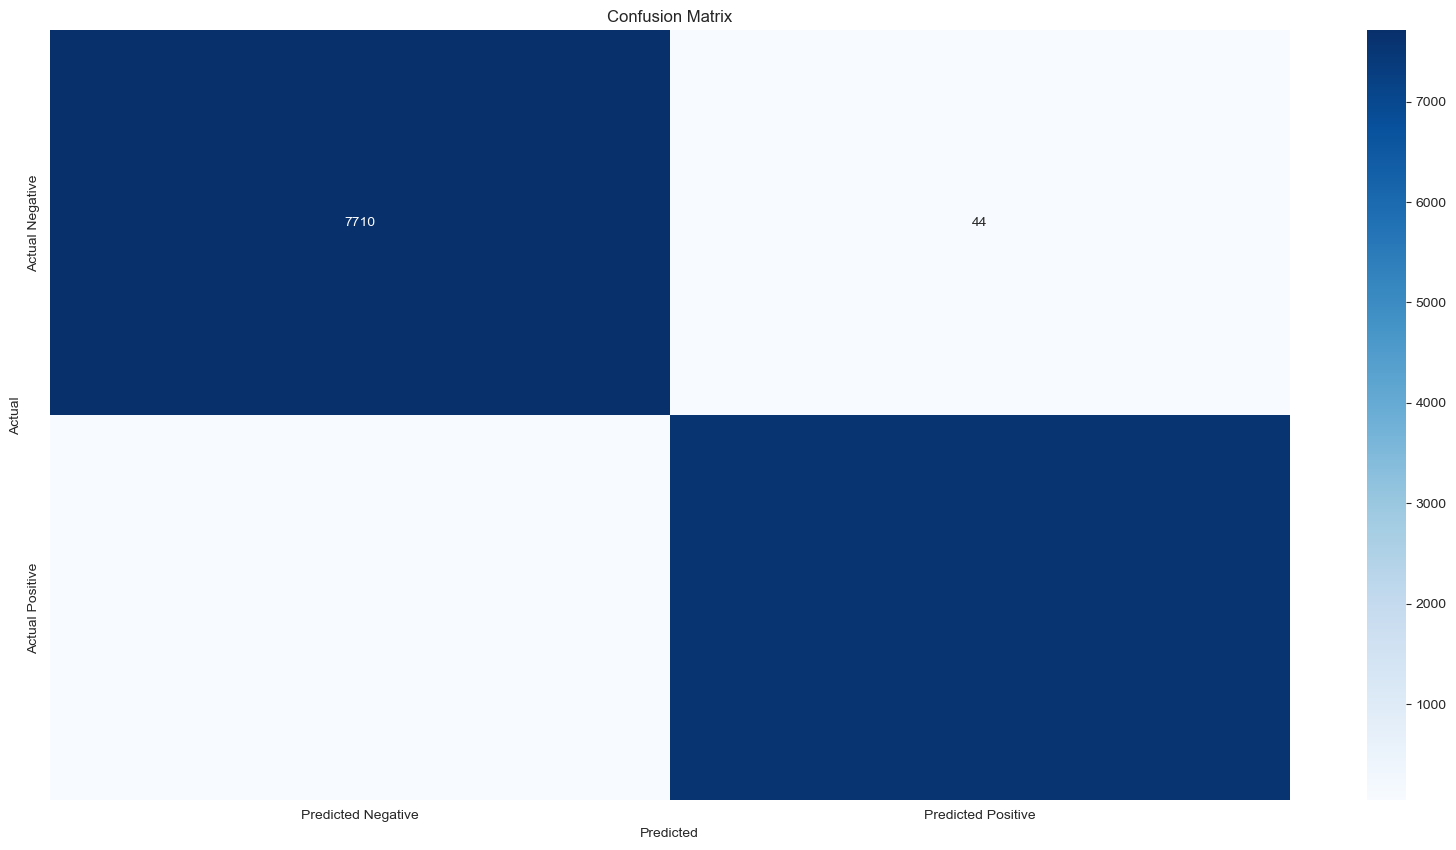

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ALL CLASSIFIERS

In [98]:
all_classifiers = ['Logistic Regression', 'Random Forest']
all_train_accuracy = [train_accuracy_logi, train_accuracy_rfc]
all_test_accuracy = [accuracy_logi, accuracy_rfc]
all_precision_score = [precision_score_logi, precision_score_rfc]
all_recall_score = [recall_score_logi, recall_score_rfc]
all_f1_score = [f1_score_logi, f1_score_rfc]
all_auc_score = [roc_score_logi, roc_score_rfc]

In [99]:
compare_classifier1 = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})


In [100]:
compare_classifier1

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.982,0.983,0.983,0.982,0.983,0.983
1,Random Forest,1.000,0.993,0.993,0.993,0.993,0.993


In [101]:
all_classifiers = [ 'XGBoost', 'SVM+LASSO', 'LR/RF/XGBOOST', 'LR/SVM+LASSO/XGBOOST', 'RF, XGBOOST']
all_train_accuracy = [ Xg_accuracy, sv_accuracy, ens1_accuracy, ens2_accuracy,ens3_accuracy]
all_test_accuracy = [ Xg_accuracy, sv_accuracy, ens1_accuracy, ens2_accuracy, ens3_accuracy]
all_precision_score = [ Xg_precision, sv_precision, ens1_precision, ens2_precision,ens3_precision]
all_recall_score = [ Xg_recall, sv_recall, ens1_recall, ens2_recall, ens3_recall]
all_f1_score = [ Xg_f1, sv_f1, ens1_f1, ens2_f1, ens3_f1]
all_auc_score = [ Xg_roc_auc, sv_roc_auc, ens1_roc_auc, ens2_roc_auc, ens3_roc_auc]

In [102]:
compare_classifier2 = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [103]:
compare_classifier2

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.993424,0.993424,0.993815,0.992900,0.993357,0.999748
1,SVM+LASSO,0.982747,0.982747,0.982643,0.982514,0.982578,0.998729
2,LR/RF/XGBOOST,0.993424,0.993424,0.992519,0.994215,0.993366,0.999620
3,LR/SVM+LASSO/XGBOOST,0.989323,0.989323,0.989090,0.989351,0.989220,0.999408
4,"RF, XGBOOST",0.994466,0.994466,0.994217,0.994610,0.994413,0.999676
